## Reading many similar files from a folder and combining the results with info from a different source



In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

First we try to read one file to make sure we're using the correct parameters:

In [40]:
test = pd.read_csv('metadata/001.txt', delim_whitespace=True, names=['wavenumber','intensity'])
test

,wavenumber,intensity
0,500,0.029038
1,501,0.036377
2,502,0.022507
3,503,0.017778
4,504,0.062998
...,...,...
196,696,0.021754
197,697,0.005134
198,698,0.036723
199,699,0.013820


In [41]:
import glob
import os

path = r'metadata' 
txt_files = glob.glob(os.path.join(path , "[0-9][0-9][0-9].txt"))
n = len(txt_files)
txt_files.sort()
txt_files

['metadata/001.txt',
 'metadata/002.txt',
 'metadata/003.txt',
 'metadata/004.txt',
 'metadata/005.txt',
 'metadata/006.txt',
 'metadata/007.txt',
 'metadata/008.txt',
 'metadata/009.txt',
 'metadata/010.txt',
 'metadata/011.txt',
 'metadata/012.txt',
 'metadata/013.txt',
 'metadata/014.txt',
 'metadata/015.txt',
 'metadata/016.txt',
 'metadata/017.txt',
 'metadata/018.txt',
 'metadata/019.txt',
 'metadata/020.txt',
 'metadata/021.txt',
 'metadata/022.txt',
 'metadata/023.txt',
 'metadata/024.txt']

In [42]:
d = pd.concat((pd.read_csv(f, delim_whitespace=True, names=['wavenumber','intensity']) for f in txt_files), ignore_index=False, keys=range(n), names=['ID','row'])
d = d.reset_index(level=['ID']) # trick to convert the confusing (to me) multiindex into a standard column
d

,ID,wavenumber,intensity
row,,,
0,0,500,0.029038
1,0,501,0.036377
2,0,502,0.022507
3,0,503,0.017778
4,0,504,0.062998
...,...,...,...
196,23,696,0.056958
197,23,697,0.061701
198,23,698,0.029431


Let's plot these to check that it makes sense:

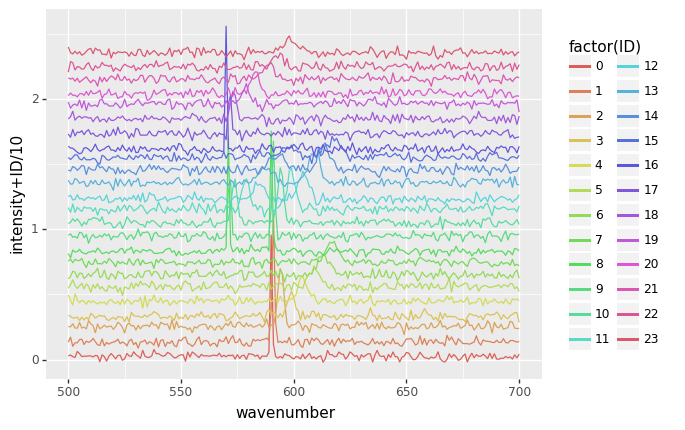

<ggplot: (8782924166551)>

In [43]:
#conda install -c conda-forge plotnine 
from plotnine import *
# note the use of parentheses, because the syntax below (+) is non-standard in Python
(ggplot(d) +
  geom_line(aes(x = 'wavenumber',
                  y = 'intensity+ID/10',
                  color = 'factor(ID)')))

This seems reasonable, but now we'd like to retrieve the parameters for each file, which are stored in file `parameters.txt`.

In [44]:
meta = pd.read_csv('metadata/parameters.txt', delim_whitespace=True)

meta['ID'] = range(meta.shape[0])
meta


,temperature,sample,ID
0,77,A,0
1,100,A,1
2,150,A,2
3,200,A,3
4,250,A,4
5,300,A,5
6,350,A,6
7,400,A,7
8,77,AB,8
9,100,AB,9


Now we need to join those two data sets:

In [45]:
full = pd.merge(d, meta, on='ID')

We now have access to the whole set of variables corresponding to each data point:

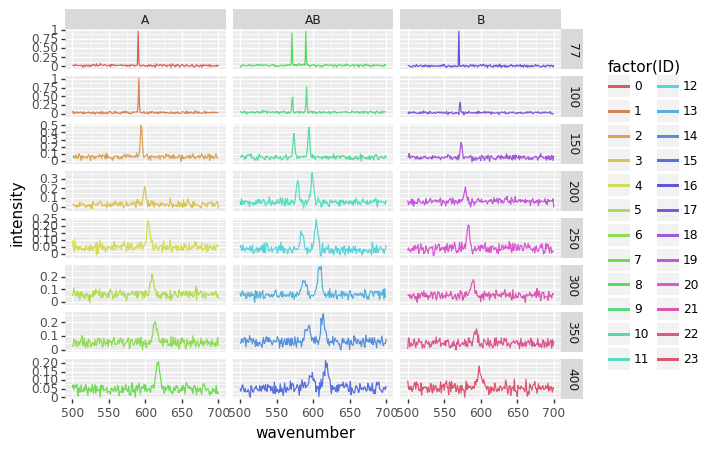

<ggplot: (8782839719434)>

In [46]:
(ggplot(full) +
  geom_line(aes(x = 'wavenumber',
                  y = 'intensity',
                  color = 'factor(ID)')) +
  facet_grid('temperature ~ sample', scales='free'))

_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/phys345/wrangling_03_folder_files_meta.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/phys345/wrangling_03_folder_files_meta.py)._